In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
#Imports the list of languages spoken in cook county generated by the "data collection" half of the project

cookcsv = "cook_languages.csv"

cookdf = pd.read_csv(cookcsv)

cookdf.head()

,Unnamed: 0,Speakers,Language,Lang_39,Lang_Code,State,County
0,0,555.0,Jamaican Creole,0,601,17,31
1,1,NaN,Krio,0,602,17,31
2,2,50.0,Pidgin,0,604,17,31
3,3,17305.0,German,0,607,17,31
4,4,1154.0,Yiddish,7,609,17,31


In [3]:
#Sorts based on the number of speakers

cookdf = cookdf.sort_values(by='Speakers', ascending = False)

cookdf.head()

,Unnamed: 0,Speakers,Language,Lang_39,Lang_Code,State,County
16,16,991495.0,Spanish,0,625,17,31
28,28,141431.0,Polish,12,645,17,31
99,99,46510.0,Tagalog,31,742,17,31
109,109,41460.0,Arabic,36,777,17,31
79,79,39185.0,Chinese,0,708,17,31


In [4]:
#this just creates a total for "other" languages that is the sum of all languages with under 20,000 speakers. 
#It gets used later

cooksum = 0

for row in cookdf.Speakers:
    if row < 20000:
        cooksum = cooksum + row

cooksum

250953.0

In [5]:
#this drops everything with a number of speakers less than 20,000 (we can't have 150 languages in the pie chart)

cookdf = cookdf[cookdf['Speakers'] > 20000]

cookdf.head(20)


,Unnamed: 0,Speakers,Language,Lang_39,Lang_Code,State,County
16,16,991495.0,Spanish,0,625,17,31
28,28,141431.0,Polish,12,645,17,31
99,99,46510.0,Tagalog,31,742,17,31
109,109,41460.0,Arabic,36,777,17,31
79,79,39185.0,Chinese,0,708,17,31
92,92,31321.0,Korean,24,724,17,31
24,24,26215.0,Russian,11,639,17,31
48,48,23250.0,Gujarati,18,667,17,31
22,22,23031.0,Greek,10,637,17,31
11,11,22651.0,Italian,4,619,17,31


In [6]:
#Drop the junk columns
#https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones

cookdf = cookdf.loc[:, cookdf.columns.intersection(['Speakers', 'Language'])]

cookdf.head()

,Speakers,Language
16,991495.0,Spanish
28,141431.0,Polish
99,46510.0,Tagalog
109,41460.0,Arabic
79,39185.0,Chinese


In [7]:
#This takes the number of speakers of other languages that we calculated above and adds it to the dataframe. 

addendum = pd.DataFrame({'Speakers': [cooksum],
                        'Language': ['Other']})

cookdf = cookdf.append(addendum)

cookdf.head(20)

,Speakers,Language
16,991495.0,Spanish
28,141431.0,Polish
99,46510.0,Tagalog
109,41460.0,Arabic
79,39185.0,Chinese
92,31321.0,Korean
24,26215.0,Russian
48,23250.0,Gujarati
22,23031.0,Greek
11,22651.0,Italian


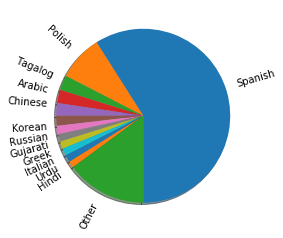

In [11]:
labels = cookdf['Language']
sizes = cookdf['Speakers']

fig, ax = plt.subplots()
pie = ax.pie(sizes, labels = labels, shadow=True, startangle = 270, rotatelabels=True)

plt.savefig("cook_languages_top20.png")

plt.show()

In [9]:
#set the float number of speakers to an int to get read of that last 0
cookdf['Speakers'] = cookdf['Speakers'].astype(int)

cookdf_pivot = cookdf.set_index('Language')
cookdf_pivot = cookdf_pivot.T

cookdf_pivot

Language,Spanish,Polish,Tagalog,Arabic,Chinese,Korean,Russian,Gujarati,Greek,Italian,Urdu,Hindi,Other
Speakers,991495,141431,46510,41460,39185,31321,26215,23250,23031,22651,22583,20180,250953


In [10]:
cookdf_pivot.to_csv('cook_lang_summary.csv')